<a href="https://colab.research.google.com/github/nayeemz6/Data_Mining_and_Analysis_CW1/blob/main/Data_Mining_And_Analysis_CW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import the necessary libraries**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA

#**Getting CSV**

In [42]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LFB_2019-22.csv")
pd.options.display.max_columns = None
df.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000006-01012019,01 Jan 2019,2019,00:01:45,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,SE11,0,21901674,E09000022,LAMBETH,Lambeth,E05014105,Kennington,Kennington,NaN,NaN,530850,178650,NaN,NaN,London,Lambeth,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,333.0,2.0
1,000019-01012019,01 Jan 2019,2019,00:04:33,0,Fire,Secondary Fire,NaN,Outdoor,Tree scrub,On land associated with building,N9 7HU,N9,207088775,20704497,E09000010,ENFIELD,Enfield,E05013685,Lower Edmonton,Lower Edmonton,534494.0,194099.0,534450,194050,51.629641,-0.058219,London,Edmonton,357.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
2,000020-01012019,01 Jan 2019,2019,00:04:39,0,False Alarm,False alarm - Good intent,NaN,Outdoor,Domestic garden (vegetation not equipment),In street outside gazetteer location,N20 0BB,N20,200100401,20037660,E09000003,BARNET,Barnet,E05013629,Brunswick Park,Brunswick Park,527630.0,193922.0,527650,193950,51.629649,-0.157400,London,Barnet,318.0,Southgate,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
3,000021-01012019,01 Jan 2019,2019,00:04:44,0,False Alarm,AFA,NaN,Dwelling,Stately Home (part not open to public),Within same building,NaN,SW7,0,8400731,E09000033,WESTMINSTER,Westminster,E05013797,Knightsbridge & Belgravia,Knightsbridge & Belgravia,NaN,NaN,526750,179550,NaN,NaN,London,Kensington,210.0,Kensington,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
4,000024-01012019,01 Jan 2019,2019,00:05:00,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,E3,0,22700484,E09000030,TOWER HAMLETS,Tower Hamlets,E05009319,Bow East,Bow East,NaN,NaN,537250,183250,NaN,NaN,London,Poplar,329.0,Bethnal Green,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0


#**Subsetting**

In [43]:
df1 = df.loc[df['IncGeo_BoroughName'] == 'HILLINGDON']
df1.head(2)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
60,000200-01012019,01 Jan 2019,2019,01:15:12,1,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,UB4,0,21401794,E09000017,HILLINGDON,Hillingdon,E05013583,Yeading,Yeading,NaN,NaN,511750,181550,NaN,NaN,London,Southall,357.0,Southall,529.0,Northolt,2.0,2.0,2.0,2.0,666.0,2.0
115,000344-01012019,01 Jan 2019,2019,05:51:14,5,False Alarm,AFA,NaN,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Correct incident location,NaN,HA6,0,21400844,E09000017,HILLINGDON,Hillingdon,E05013574,Northwood,Northwood,NaN,NaN,509850,191350,NaN,NaN,London,Ruislip,437.0,Harrow,442.0,Ruislip,2.0,2.0,2.0,1.0,333.0,1.0


In [44]:
df1.shape
df1.to_csv('/content/drive/MyDrive/Colab Notebooks/HILLINGDON.csv')
df1.describe()

,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
count,13267.000000,13267.000000,1.326700e+04,1.326700e+04,8166.000000,8166.000000,13267.000000,13267.000000,8166.000000,8166.000000,12803.000000,4833.000000,13153.000000,13153.000000,13166.000000,13162.000000,13162.000000,13267.00000
mean,2020.533127,13.407251,3.220999e+10,2.217676e+07,507963.109846,181373.302964,508161.803724,182181.212784,50.978882,-0.440373,371.248770,475.244982,1.373983,1.506881,1.573902,1.456010,508.887631,1.40710
std,1.137541,6.209801,4.651034e+10,7.770994e+06,2072.781153,4600.208290,2051.139706,4439.753199,5.259853,0.054467,148.412713,169.097316,0.646049,0.747239,1.473441,5.609165,2011.619876,1.80974
min,2019.000000,0.000000,0.000000e+00,2.060403e+07,503582.000000,173821.000000,503550.000000,173850.000000,0.000000,-0.510155,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,333.000000,1.00000
25%,2019.000000,9.000000,0.000000e+00,2.140073e+07,506135.750000,177075.000000,506350.000000,179250.000000,51.482465,-0.470651,282.000000,369.000000,1.000000,1.000000,1.000000,1.000000,339.000000,1.00000
50%,2021.000000,14.000000,1.002280e+10,2.140134e+07,507738.000000,181025.000000,508150.000000,181650.000000,51.517662,-0.447705,351.000000,448.000000,1.000000,1.000000,1.000000,1.000000,352.000000,1.00000
75%,2022.000000,18.000000,1.000214e+11,2.140203e+07,509677.500000,184356.000000,509850.000000,185050.000000,51.547935,-0.419874,435.000000,548.000000,2.000000,2.000000,2.000000,1.000000,364.000000,1.00000
max,2022.000000,23.000000,2.000030e+11,9.999012e+07,524352.000000,193607.000000,524350.000000,193650.000000,51.631654,0.000000,1196.000000,1200.000000,6.000000,7.000000,101.000000,501.000000,182364.000000,59.00000


In [45]:
df1.columns

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpHoursRoundUp', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

#**Checking Null Values**

In [46]:
print(df1.isnull().sum())

IncidentNumber                               0
DateOfCall                                   0
CalYear                                      0
TimeOfCall                                   0
HourOfCall                                   0
IncidentGroup                                0
StopCodeDescription                          0
SpecialServiceType                        9530
PropertyCategory                             0
PropertyType                                 0
AddressQualifier                             0
Postcode_full                             5101
Postcode_district                            0
UPRN                                         0
USRN                                         0
IncGeo_BoroughCode                           0
IncGeo_BoroughName                           0
ProperCase                                   0
IncGeo_WardCode                              0
IncGeo_WardName                              0
IncGeo_WardNameNew                           0
Easting_m    

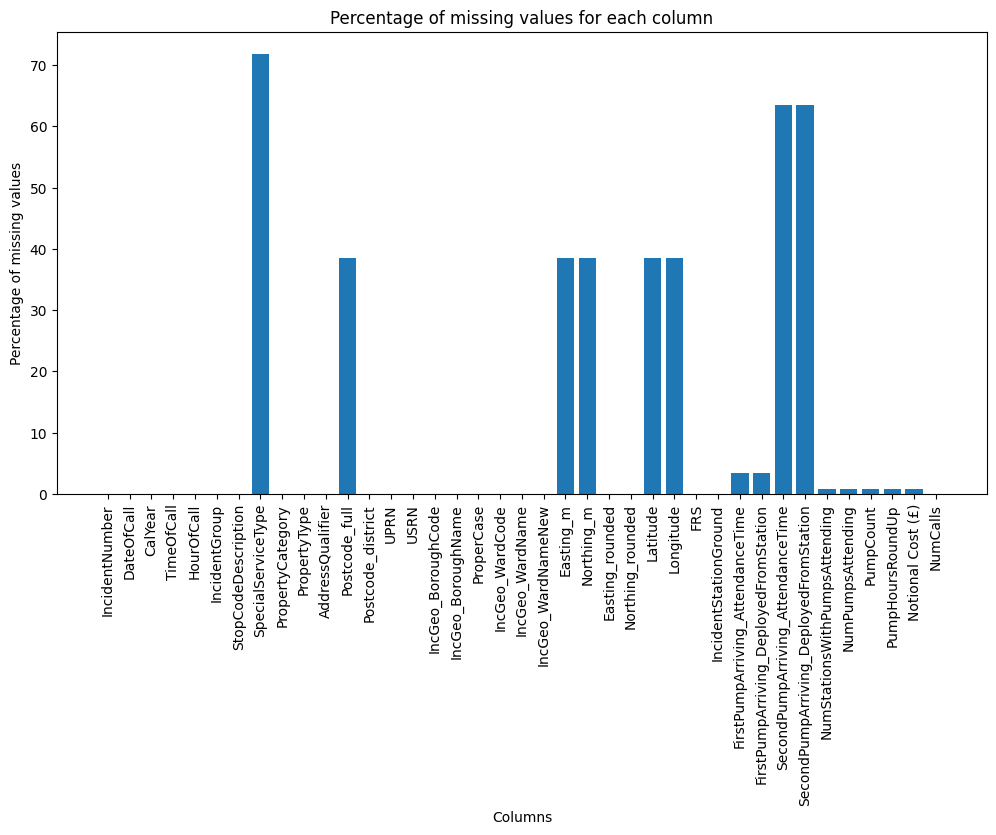

In [47]:
# Calculate percentage of missing values for each column
missing_percentages = (df1.isnull().sum() / len(df1)) * 100

# Create a bar plot of missing percentage for each column
plt.figure(figsize=(12, 6))
plt.bar(missing_percentages.index, missing_percentages.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values for each column')
plt.show()

#**Handling Missing Values**

In [48]:
# Step 1: Identify columns with missing values
missing_cols = df1.columns[df1.isna().any()]

In [49]:
# Step 2: Get total number of missing values in each column
missing_counts = df1[missing_cols].isna().sum()

In [50]:
# Step 3a: Remove rows with missing values
df1 = df1.dropna()


In [51]:
# Step 3b: Fill missing values with mean of column
df1 = df1.fillna(df1.mean())

<ipython-input-51-4c9a860f45f7>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = df1.fillna(df1.mean())


In [52]:
# Step 3c: Interpolate missing values
df1 = df1.interpolate()

In [53]:
# Step 4: Implement chosen strategy
df1[missing_cols] = df1[missing_cols].fillna(df1[missing_cols].mean())

<ipython-input-53-8ed45818f542>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1[missing_cols] = df1[missing_cols].fillna(df1[missing_cols].mean())


In [54]:
# Check the percentage of missing values in each column
missing_percentage = df1.isna().mean().round(4) * 100
print(missing_percentage)

# Drop columns with missing values over 50%
missing_cols = missing_percentage[missing_percentage > 50].index
df1 = df1.drop(columns=missing_cols)


IncidentNumber                            0.0
DateOfCall                                0.0
CalYear                                   0.0
TimeOfCall                                0.0
HourOfCall                                0.0
IncidentGroup                             0.0
StopCodeDescription                       0.0
SpecialServiceType                        0.0
PropertyCategory                          0.0
PropertyType                              0.0
AddressQualifier                          0.0
Postcode_full                             0.0
Postcode_district                         0.0
UPRN                                      0.0
USRN                                      0.0
IncGeo_BoroughCode                        0.0
IncGeo_BoroughName                        0.0
ProperCase                                0.0
IncGeo_WardCode                           0.0
IncGeo_WardName                           0.0
IncGeo_WardNameNew                        0.0
Easting_m                         

#**EDA**

##Analyze the most common incident types and their frequency

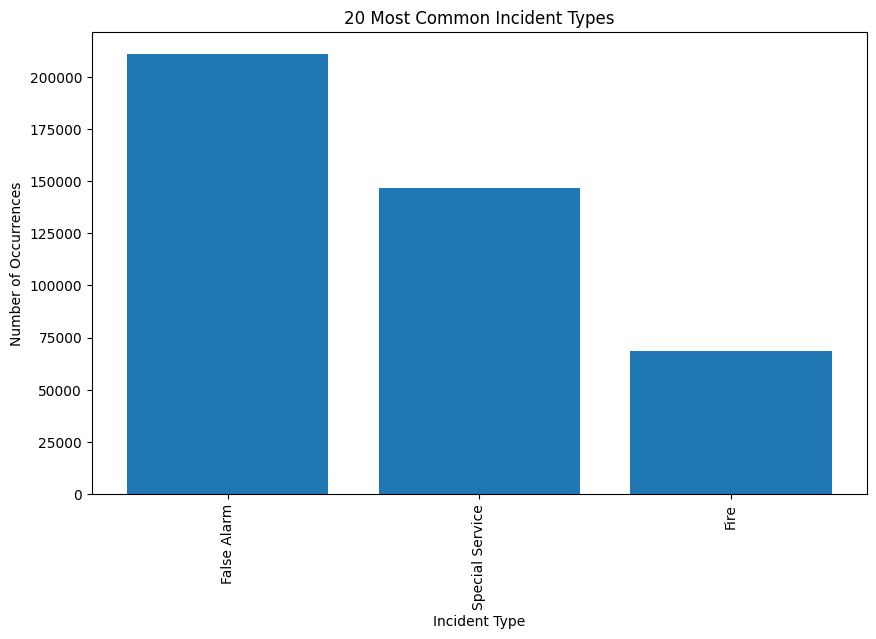

In [55]:
# Identify the most common types of incidents
# Count the number of occurrences of each incident type and sort them in descending order
incidents = df['IncidentGroup'].value_counts().sort_values(ascending=False)[:50]

# Create a bar plot of the top 20 incident types
plt.figure(figsize=(10,6))
plt.bar(incidents.index, incidents.values)
plt.title('20 Most Common Incident Types')
plt.xlabel('Incident Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.show()

##Analyze the time of occurrence

In [56]:
df1['TimeOfCall'] = pd.to_datetime(df1['TimeOfCall'])
df1['Hour'] = df1['TimeOfCall'].dt.hour
hour_counts = df1['Hour'].value_counts().sort_index()
print("Hourly frequency of incidents:")
print(hour_counts)

Hourly frequency of incidents:
0     16
1     24
2     11
3      4
4     14
5     10
6     19
7     21
8     24
9     19
10    23
11    26
12    37
13    33
14    33
15    38
16    40
17    31
18    34
19    38
20    20
21    38
22    25
23    26
Name: Hour, dtype: int64


##Analyze the location of incidents

In [57]:
location_counts = df1['Postcode_district'].value_counts().sort_values(ascending=False)
print("Top 10 most common incident locations:")
print(location_counts.head(10))


Top 10 most common incident locations:
TW6     128
UB3      91
UB8      69
UB7      66
UB10     57
HA4      54
UB4      46
TW19     26
HA5      17
HA6      17
Name: Postcode_district, dtype: int64


##Plot the incident location frequency distribution

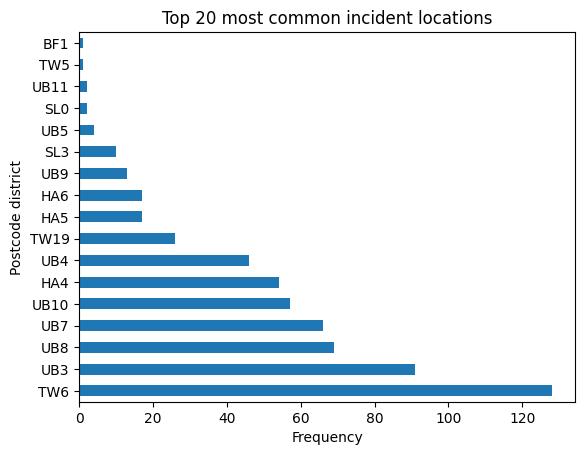

In [58]:
location_counts.head(20).plot(kind='barh')
plt.title("Top 20 most common incident locations")
plt.xlabel("Frequency")
plt.ylabel("Postcode district")
plt.show()

## Incidents per year

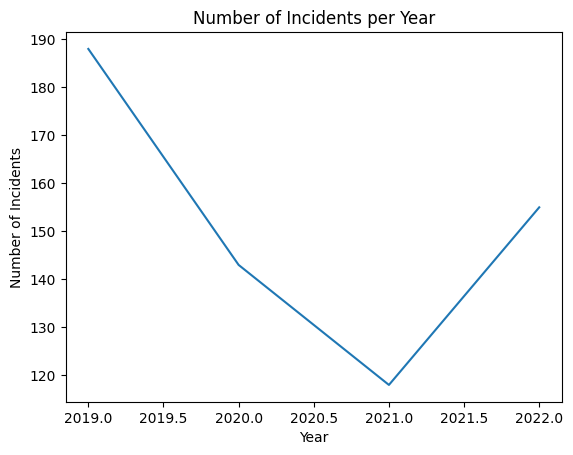

In [59]:
# Group the data by year and count the number of incidents per year
incidents_per_year = df1.groupby('CalYear')['IncidentNumber'].count()

# Create a line plot of the incidents per year
plt.plot(incidents_per_year.index, incidents_per_year.values)

# Set the title and axis labels
plt.title('Number of Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

# Display the plot
plt.show()

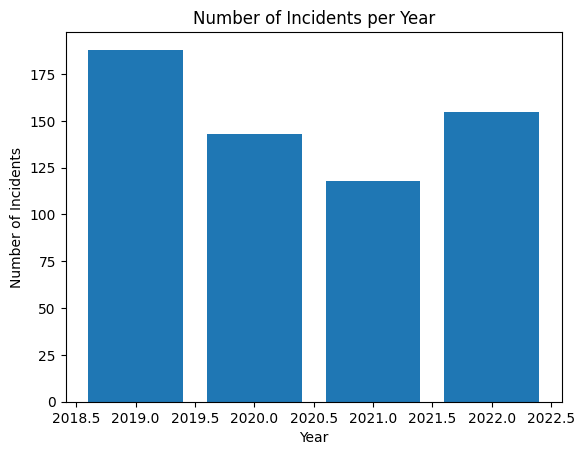

In [60]:
# Group the data by year and count the number of incidents per year
incidents_per_year = df1.groupby('CalYear')['IncidentNumber'].count()

# Create a bar chart of the incidents per year
plt.bar(incidents_per_year.index, incidents_per_year.values)

# Set the title and axis labels
plt.title('Number of Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

# Display the plot
plt.show()

##Incidents per month

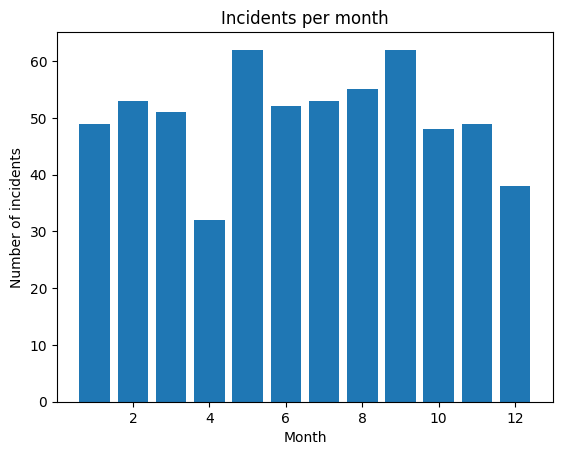

In [61]:
# Convert 'Date' column to datetime
df1['DateOfCall'] = pd.to_datetime(df1['DateOfCall'])

# Extract the month from the 'Date' column
df1['Month'] = df1['DateOfCall'].dt.month
incidents_per_month = df1.groupby('Month').count()['IncidentNumber']

# Plot the data
plt.bar(incidents_per_month.index, incidents_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of incidents')
plt.title('Incidents per month')
plt.show()

# Incidents per day

DateOfCall
2019-01-03    1
2019-01-07    1
2019-01-13    1
2019-01-15    1
2019-01-17    1
             ..
2022-11-07    1
2022-11-11    1
2022-11-16    1
2022-11-17    1
2022-11-22    1
Length: 498, dtype: int64


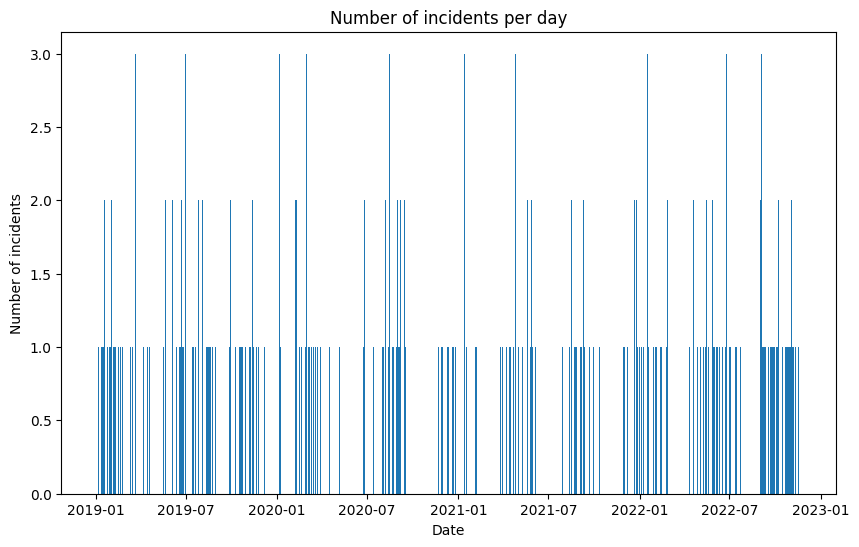

In [62]:
# Convert DateOfCall column to datetime format
df1['DateOfCall'] = pd.to_datetime(df1['DateOfCall'])

# Group incidents by date and count occurrences
incidents_per_day = df1.groupby(df1['DateOfCall'].dt.date).size()

# Print the resulting DataFrame
print(incidents_per_day)

# Create plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(incidents_per_day.index, incidents_per_day.values)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of incidents')
ax.set_title('Number of incidents per day')

plt.show()


#Incidents per hours

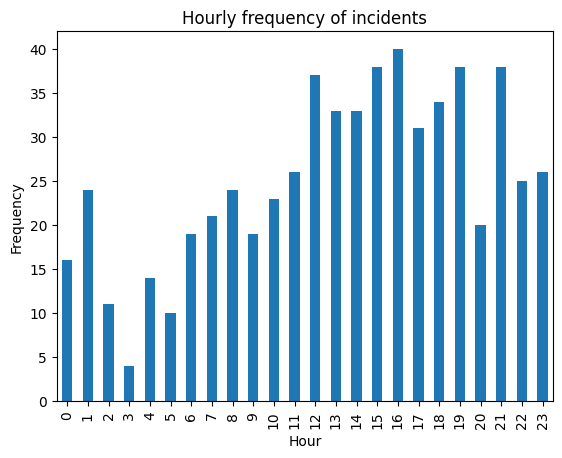

In [63]:
hour_counts.plot(kind='bar')
plt.title("Hourly frequency of incidents")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.show()

#Exploring the relationship between the type of incident and the property type and identifying any correlations that may exist.

In [64]:
# Create a cross tabulation of PropertyCategory and IncidentType
incident_vs_property = pd.crosstab(df1['IncidentGroup'], df1['PropertyCategory'])
print(incident_vs_property)

PropertyCategory  Aircraft  Boat  Non Residential  Other Residential  Outdoor  \
IncidentGroup                                                                   
Special Service         80     5               42                  5       47   

PropertyCategory  Outdoor Structure  Rail Vehicle  Road Vehicle  
IncidentGroup                                                    
Special Service                   9             3           413  


<Axes: xlabel='IncidentGroup', ylabel='PropertyType'>

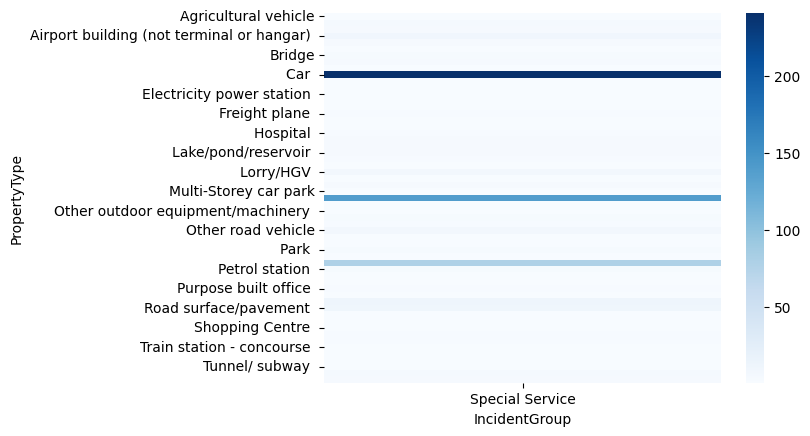

In [65]:
# Group the data by incident type and property type and count the occurrences
incident_prop_counts = df1.groupby(['IncidentGroup', 'PropertyType']).size().reset_index(name='counts')

# Create a heatmap using the counts as the values
sns.heatmap(incident_prop_counts.pivot(index='PropertyType', columns='IncidentGroup', values='counts'), cmap='Blues')


#Easting vs Northing

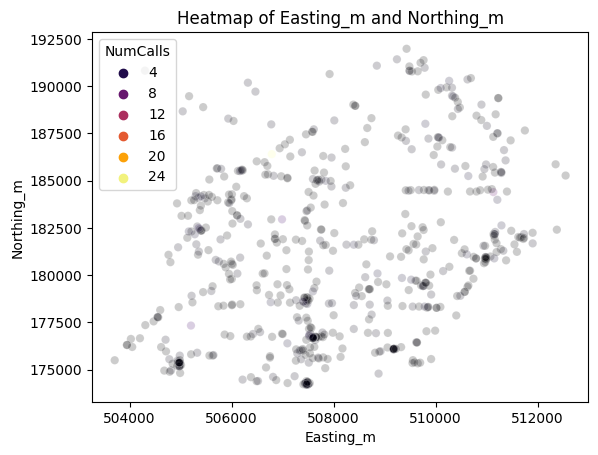

In [66]:
# create a scatter plot with a heatmap-like color scheme
sns.scatterplot(x='Easting_m', y='Northing_m', data=df1, alpha=0.2, hue='NumCalls', palette='inferno')

# add a title and axis labels
plt.title('Heatmap of Easting_m and Northing_m')
plt.xlabel('Easting_m')
plt.ylabel('Northing_m')

# display the plot
plt.show()

#Clustering as EDA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


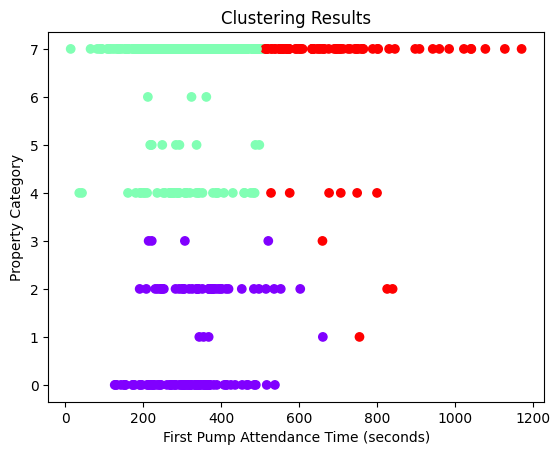

In [67]:
# Encode categorical columns
le = LabelEncoder()
df1['IncidentGroup'] = le.fit_transform(df1['IncidentGroup'])
df1['PropertyCategory'] = le.fit_transform(df1['PropertyCategory'])
# Create feature matrix X
X = df1[['IncidentGroup', 'PropertyCategory', 'FirstPumpArriving_AttendanceTime']].values
# Scale the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
# Add cluster labels to the dataframe
df1['Cluster'] = clusters
# Create scatter plot
plt.scatter(df1['FirstPumpArriving_AttendanceTime'], df1['PropertyCategory'], c=kmeans.labels_, cmap='rainbow')
# Set axis labels
plt.xlabel('First Pump Attendance Time (seconds)')
plt.ylabel('Property Category')
# Set title
plt.title('Clustering Results')
# Show the plot
plt.show()

#**Outliers**

<Axes: >

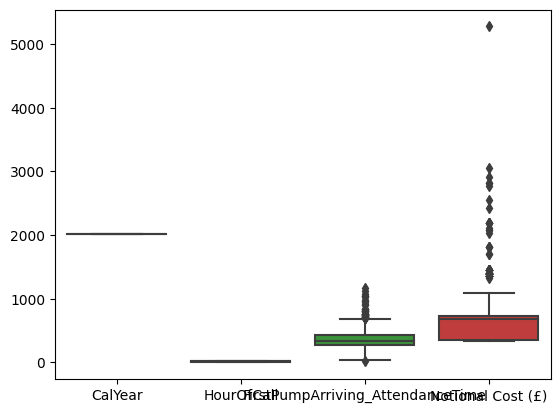

In [68]:
# Select the columns that we want to examine for outliers
cols = ['DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall','FirstPumpArriving_AttendanceTime', 'Notional Cost (£)']

# Create a dataframe with the selected columns
df_outliers = df1[cols]

# Create the scatter matrix plot
sns.boxplot(df_outliers)


In [69]:
data_trimmed = df1[['PropertyCategory', 'PropertyType', 'Notional Cost (£)', 'NumCalls']]

# remove outliers in FirstPumpArriving_AttendanceTime and Notional Cost (£)
data_trimmed['FirstPumpArriving_AttendanceTime'] = df1[(df1['FirstPumpArriving_AttendanceTime'] > 804.17) | (df1['FirstPumpArriving_AttendanceTime'] < -95.95)]['FirstPumpArriving_AttendanceTime']

data_trimmed['Notional Cost (£)'] = df1[(df1['Notional Cost (£)'] > 27636.84) | (df1['Notional Cost (£)'] < -26322.81)]['Notional Cost (£)']


<ipython-input-69-71e1da974f2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trimmed['FirstPumpArriving_AttendanceTime'] = df1[(df1['FirstPumpArriving_AttendanceTime'] > 804.17) | (df1['FirstPumpArriving_AttendanceTime'] < -95.95)]['FirstPumpArriving_AttendanceTime']
<ipython-input-69-71e1da974f2a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trimmed['Notional Cost (£)'] = df1[(df1['Notional Cost (£)'] > 27636.84) | (df1['Notional Cost (£)'] < -26322.81)]['Notional Cost (£)']


##Checking outliers for FirstPumpArriving_AttendanceTime

Number of outliers:
 40
Percentage of outliers: 6.62%


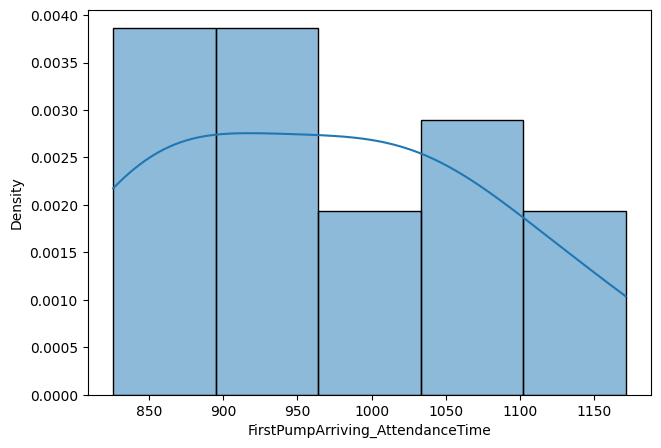

In [70]:
# select the column of interest from df1
cols = df1['FirstPumpArriving_AttendanceTime']
# calculate summary statistics for the Notional Cost column
summary = cols.describe()
# calculate interquartile range for the column
q1 = summary.loc['25%']
q3 = summary.loc['75%']
iqr = q3 - q1
# identify potential outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((cols < lower_bound) | (cols > upper_bound))
# calculate the number and percentage of outliers
num_outliers = outliers.sum()
pct_outliers = num_outliers / len(cols) * 100
print(f"Number of outliers:\n {num_outliers}")
print(f"Percentage of outliers: {pct_outliers:.2f}%")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(data_trimmed['FirstPumpArriving_AttendanceTime'],kde=True,stat="density")
plt.show()

##Checking outliers for Notional Cons (£)

In [71]:
# select the column of interest from df1
costs = df1['Notional Cost (£)']
# calculate summary statistics for the Notional Cost column
summary = costs.describe()
# calculate interquartile range for the column
q1 = summary.loc['25%']
q3 = summary.loc['75%']
iqr = q3 - q1
# identify potential outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((costs < lower_bound) | (costs > upper_bound))
# calculate the number and percentage of outliers
num_outliers = outliers.sum()
pct_outliers = num_outliers / len(costs) * 100
print(f"Number of outliers:\n {num_outliers}")
print(f"Percentage of outliers: {pct_outliers:.2f}%")

Number of outliers:
 65
Percentage of outliers: 10.76%


##Checking outliers for Property Category

In [72]:
# select the column of interest from df1
cols = df1['PropertyCategory']
# calculate summary statistics for the Notional Cost column
summary = cols.describe()
# calculate interquartile range for the column
q1 = summary.loc['25%']
q3 = summary.loc['75%']
iqr = q3 - q1
# identify potential outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((cols < lower_bound) | (cols > upper_bound))
# calculate the number and percentage of outliers
num_outliers = outliers.sum()
pct_outliers = num_outliers / len(cols) * 100
print(f"Number of outliers:\n {num_outliers}")
print(f"Percentage of outliers: {pct_outliers:.2f}%")


Number of outliers:
 0
Percentage of outliers: 0.00%


##Checking outliers for NumCalls

In [73]:
# select the column of interest from df1
cols = df1['NumCalls']
# calculate summary statistics for the Notional Cost column
summary = cols.describe()
# calculate interquartile range for the column
q1 = summary.loc['25%']
q3 = summary.loc['75%']
iqr = q3 - q1
# identify potential outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((cols < lower_bound) | (cols > upper_bound))
# calculate the number and percentage of outliers
num_outliers = outliers.sum()
pct_outliers = num_outliers / len(cols) * 100
print(f"Number of outliers:\n {num_outliers}")
print(f"Percentage of outliers: {pct_outliers:.2f}%")


Number of outliers:
 7
Percentage of outliers: 1.16%


#**Modeling**

##Business Question -- Can we use unsupervised learning algorithms like clustering to group incidents based on their similarity and identify patterns that can help in the decision-making process?

In [74]:
# create a copy of df1
df_cluster = df1.copy()

# encode the categorical columns
le = LabelEncoder()
df_cluster['PropertyCategory'] = le.fit_transform(df_cluster['PropertyCategory'])
df_cluster['PropertyType'] = le.fit_transform(df_cluster['PropertyType'])

# standardize the numeric columns
scaler = StandardScaler()
df_cluster[['Notional Cost (£)', 'NumCalls']] = scaler.fit_transform(df_cluster[['Notional Cost (£)', 'NumCalls']])


In [75]:
# instantiate the KMeans algorithm with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# fit the algorithm to the preprocessed data
kmeans.fit(df_cluster[['PropertyCategory', 'PropertyType', 'Notional Cost (£)', 'NumCalls']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [76]:
# add the cluster labels to the original dataframe
df1['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

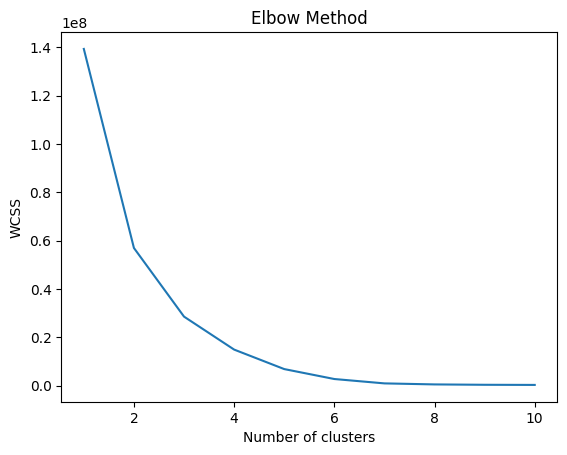

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


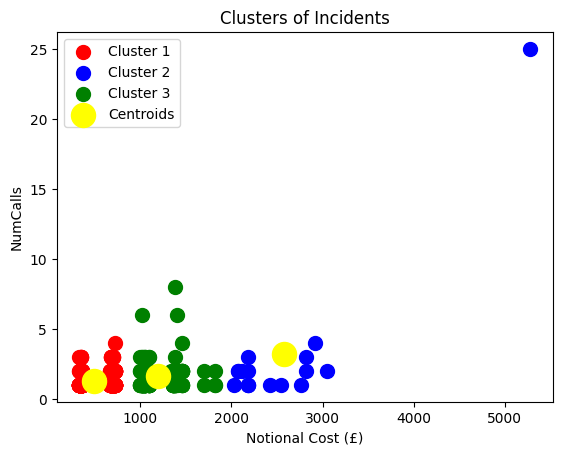

In [77]:
# Selecting columns for clustering
X = df1[["Notional Cost (£)", "NumCalls"]]

# Finding optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Creating clusters using KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plotting the clusters
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Incidents')
plt.xlabel('Notional Cost (£)')
plt.ylabel('NumCalls')
plt.legend()
plt.show()


### Business Question -- Can we use predictive models to forecast the number of incidents likely to occur in a particular time period and plan our resources accordingly?

In [80]:
# convert 'DateOfCall' column to datetime format
df1['DateOfCall'] = pd.to_datetime(df1['DateOfCall'], format='%d%m%Y')
# extract year, month, and day from 'DateOfCall' column
df1['Year'] = df1['DateOfCall'].dt.year
df1['Month'] = df1['DateOfCall'].dt.month
df1['Day'] = df1['DateOfCall'].dt.day
# create a new column for hour
df1['Hour_num'] = df1['Hour']
# select features and target variable
X = df1[['Year', 'Month', 'Day', 'Hour_num', 'Notional Cost (£)','FirstPumpArriving_AttendanceTime', 'Easting_m', 'Northing_m', 
         'NumPumpsAttending','PumpCount','Latitude','Longitude']]
y = df1['NumCalls']

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# predict on the test set
y_pred = model.predict(X_test)
# evaluate the model using r-squared and root mean squared error
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"R-squared: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R-squared: 0.12
Root Mean Squared Error: 2.14


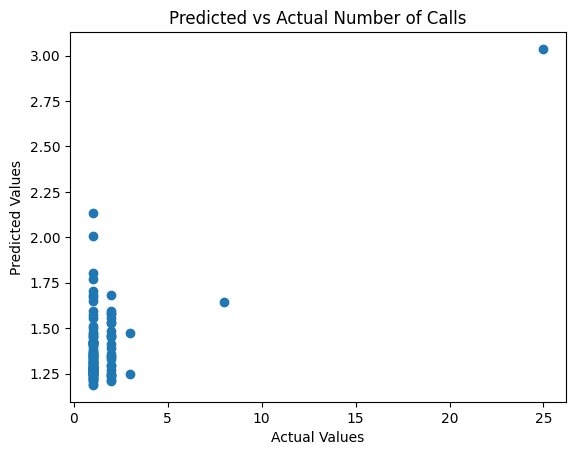

In [81]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Number of Calls")
plt.show()


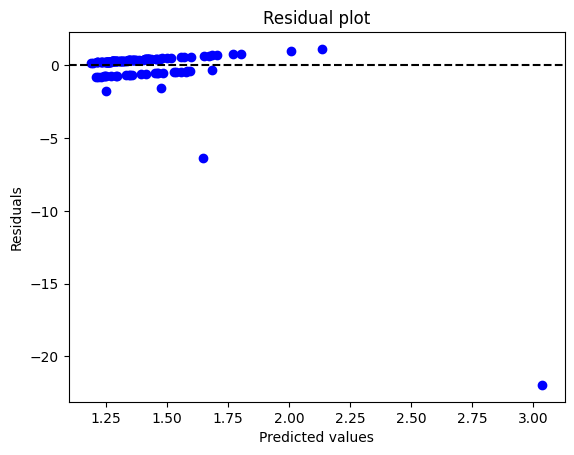

In [82]:
# make predictions on the test set
y_pred = model.predict(X_test)

# create a residual plot
plt.scatter(y_pred, y_pred - y_test, c='blue', marker='o', label='Test data')

# add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--')

# add labels and title
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')

# show the plot
plt.show()


###Use the 'Notional Cost (£)' column to predict the cost of the fire incidents Based on the values of FirstPumpArriving_AttendanceTime and NumCalls

In [83]:
# select the features and target variable
X = df1[['FirstPumpArriving_AttendanceTime', 'NumCalls']]
y = df1['Notional Cost (£)']

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model using r-squared and root mean squared error
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"The cost of fire incidents: {r2:.2f}")
print(f"The predicted cost is off by about: {rmse:.2f}")


The cost of fire incidents: 0.52
The predicted cost is off by about: 397.29


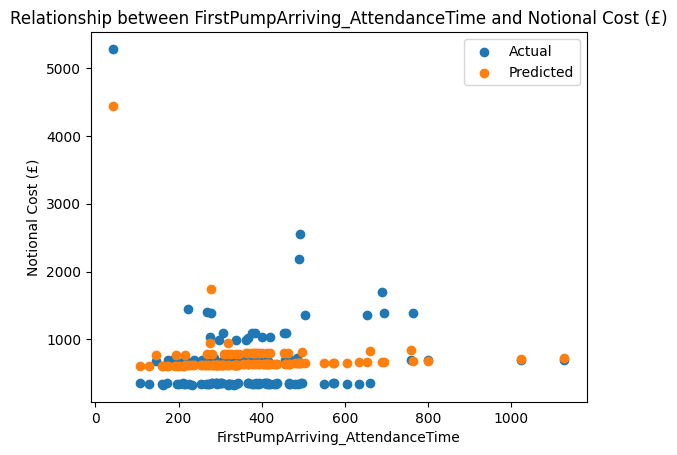

In [84]:
# create scatter plot of features and target variable
plt.scatter(X_test['FirstPumpArriving_AttendanceTime'], y_test, label='Actual')
plt.scatter(X_test['FirstPumpArriving_AttendanceTime'], y_pred, label='Predicted')

# set plot title and axis labels
plt.title('Relationship between FirstPumpArriving_AttendanceTime and Notional Cost (£)')
plt.xlabel('FirstPumpArriving_AttendanceTime')
plt.ylabel('Notional Cost (£)')

# show legend
plt.legend()

# show the plot
plt.show()


#**Descriptive Modeling**

##PCA Modeling

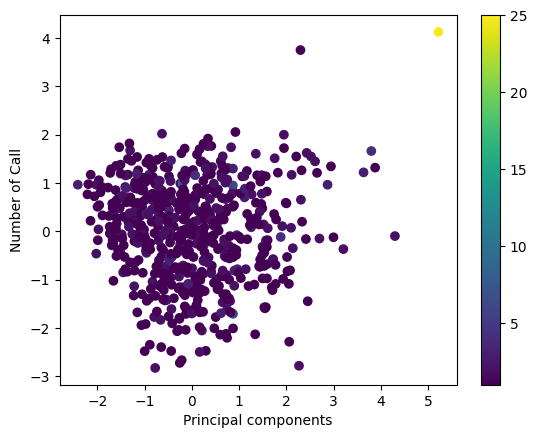

In [85]:
# select the features and target variable
X = df1[['Year', 'Month', 'Day', 'Hour_num', 'Notional Cost (£)','FirstPumpArriving_AttendanceTime']]
y = df1['NumCalls']

# standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# create the PCA object and fit the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# plot the first two principal components
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
ax.set_xlabel('Principal components')
ax.set_ylabel('Number of Call')
plt.show()

##Correlation Matrix

<Axes: >

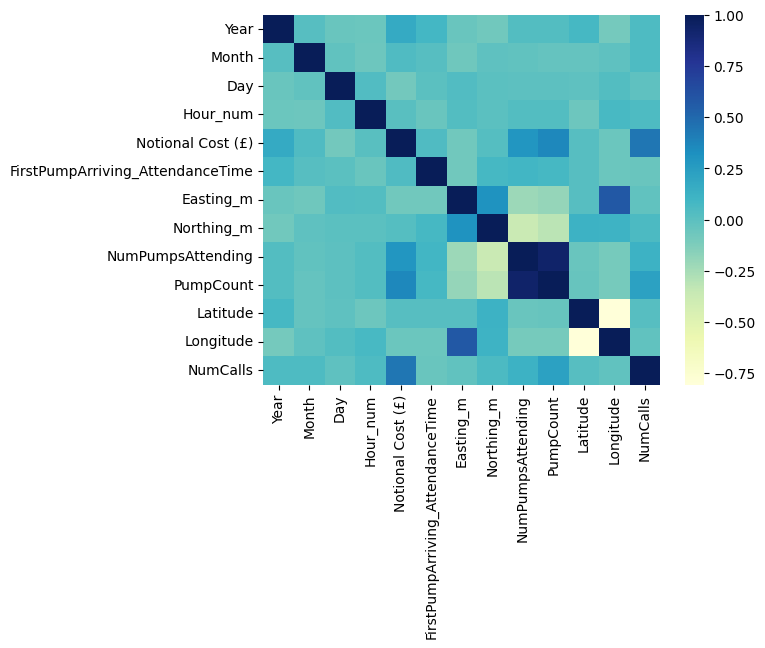

In [86]:
# create a correlation matrix of the variables
corr_matrix = df1[['Year', 'Month', 'Day', 'Hour_num', 'Notional Cost (£)',
                   'FirstPumpArriving_AttendanceTime', 'Easting_m', 'Northing_m', 
                   'NumPumpsAttending', 'PumpCount', 'Latitude', 'Longitude', 'NumCalls']].corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")

##Geospatial analysis

<ipython-input-87-8f5e0a8855f2>:5: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=coords['Longitude'], y=coords['Latitude'], cmap='Reds', shade=True, shade_lowest=False)
<ipython-input-87-8f5e0a8855f2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=coords['Longitude'], y=coords['Latitude'], cmap='Reds', shade=True, shade_lowest=False)


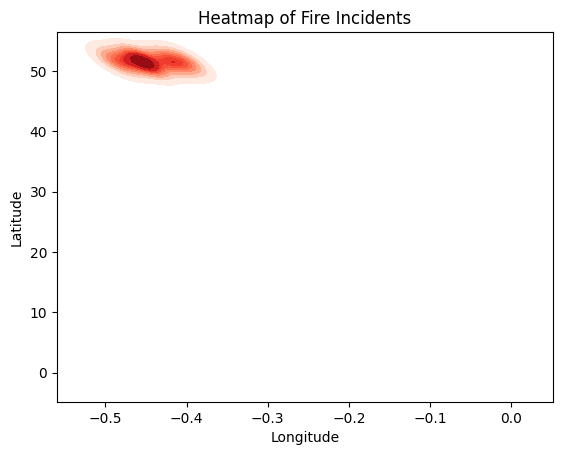

In [87]:
# get the coordinates of the incidents
coords = df1[['Latitude', 'Longitude']]

# create a heatmap of the incidents
sns.kdeplot(x=coords['Longitude'], y=coords['Latitude'], cmap='Reds', shade=True, shade_lowest=False)

# set the title and axis labels
plt.title('Heatmap of Fire Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

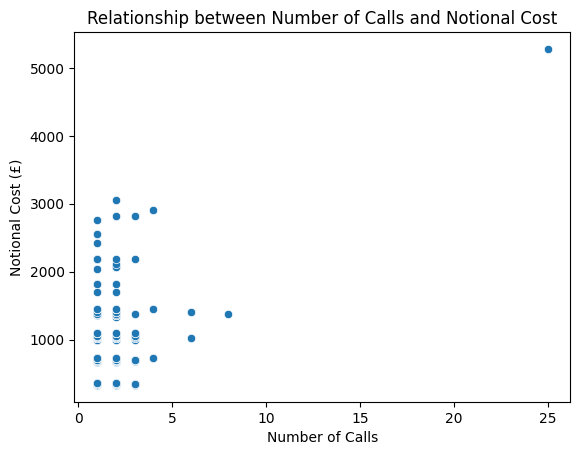

In [88]:
# select the features and target variable
X = df1[['FirstPumpArriving_AttendanceTime', 'NumCalls']]
y = df1['Notional Cost (£)']

# create a scatter plot
sns.scatterplot(data=df1, x='NumCalls', y='Notional Cost (£)')

# set the title and axis labels
plt.title('Relationship between Number of Calls and Notional Cost')
plt.xlabel('Number of Calls')
plt.ylabel('Notional Cost (£)')

# show the plot
plt.show()

###The results you provided are related to the performance of a predictive model. They indicate that the model explains 52% of the variation in the target variable and that the predictions on average are off by about 397.29 units (in the same units as the target variable).

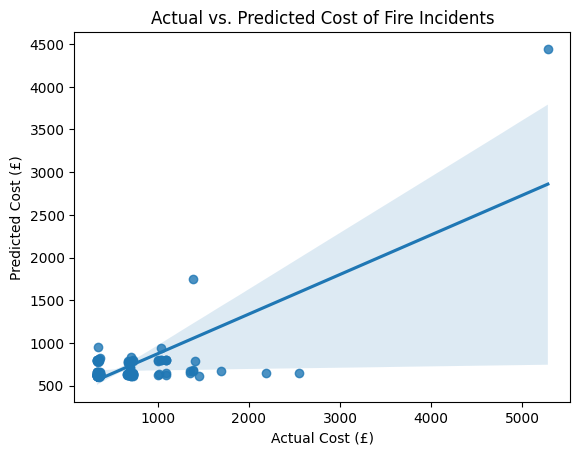

In [90]:
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Cost (£)')
plt.ylabel('Predicted Cost (£)')
plt.title('Actual vs. Predicted Cost of Fire Incidents')
plt.show()